# Outlier Detection In Class Demo

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc("figure", figsize=(16, 5))

In [14]:
df = pd.read_csv('nyc_taxi.csv',
                index_col='timestamp',
                parse_dates=True)
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10320 entries, 2014-07-01 00:00:00 to 2015-01-31 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   10320 non-null  int64
dtypes: int64(1)
memory usage: 161.2 KB


<Axes: xlabel='timestamp'>

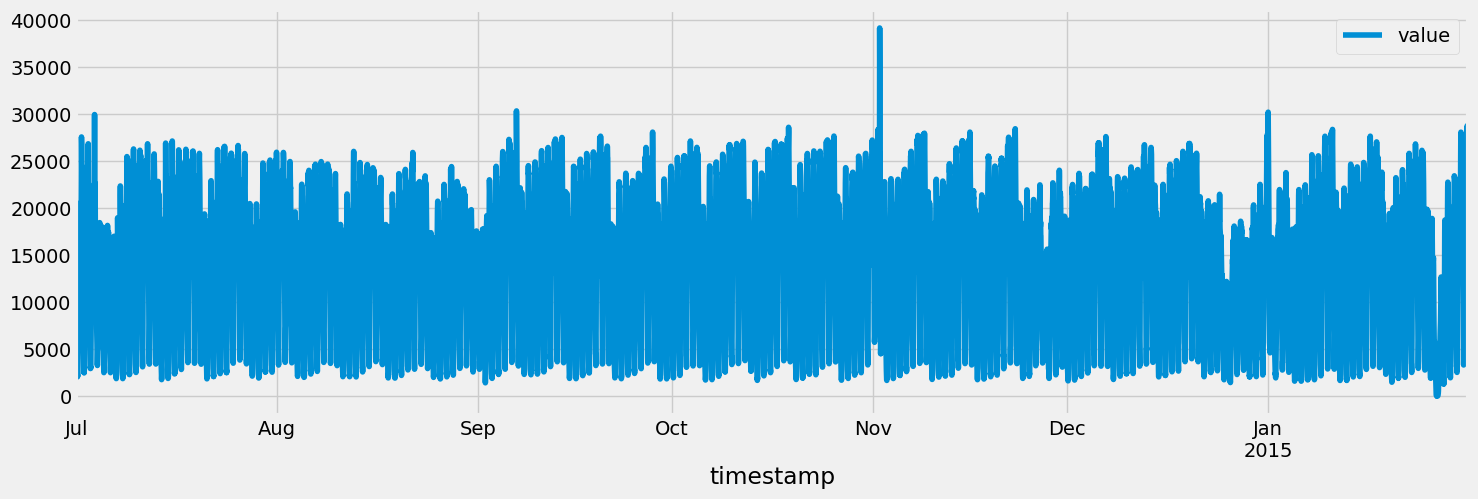

In [16]:
df.plot()

In [17]:
df.index.freq = '30min'

In [18]:
df.index

DatetimeIndex(['2014-07-01 00:00:00', '2014-07-01 00:30:00',
               '2014-07-01 01:00:00', '2014-07-01 01:30:00',
               '2014-07-01 02:00:00', '2014-07-01 02:30:00',
               '2014-07-01 03:00:00', '2014-07-01 03:30:00',
               '2014-07-01 04:00:00', '2014-07-01 04:30:00',
               ...
               '2015-01-31 19:00:00', '2015-01-31 19:30:00',
               '2015-01-31 20:00:00', '2015-01-31 20:30:00',
               '2015-01-31 21:00:00', '2015-01-31 21:30:00',
               '2015-01-31 22:00:00', '2015-01-31 22:30:00',
               '2015-01-31 23:00:00', '2015-01-31 23:30:00'],
              dtype='datetime64[ns]', name='timestamp', length=10320, freq='30min')

In [19]:
df_resampled = df.resample('D').mean()
df_resampled

,value
timestamp,
2014-07-01,15540.979167
2014-07-02,15284.166667
2014-07-03,14794.625000
2014-07-04,11511.770833
2014-07-05,11572.291667
...,...
2015-01-27,4834.541667
2015-01-28,12947.562500
2015-01-29,14686.145833


In [20]:
nyc_dates =  [
        "2014-11-01",
        "2014-11-27",
        "2014-12-25",
        "2015-01-01",
        "2015-01-27"
]

In [21]:
known_outliers = df_resampled.loc[nyc_dates]

In [22]:
def plot_outliers(outliers, data, method='KNN', halignment='right', valignment='bottom', labels=False):
    """
    Plot time series data with highlighted outliers.
    
    Parameters
    ----------
    outliers : pandas.DataFrame or pandas.Series
        The DataFrame or Series containing the outlier data points.
    data : pandas.DataFrame or pandas.Series
        The complete time series data.
    method : str, default='KNN'
        The outlier detection method used, displayed in the plot title.
    halignment : str, default='right'
        Horizontal alignment for the date labels ('left', 'center', or 'right').
    valignment : str, default='bottom'
        Vertical alignment for the date labels ('top', 'center', or 'bottom').
    labels : bool, default=False
        If True, displays date labels for each outlier point.
        
    Returns
    -------
    None
        The function shows the plot but does not return any value.
    """
    
    fig, ax = plt.subplots(figsize=(10, 6))
        
    data.plot(ax=ax, alpha=0.6)
    
    # Plot outliers
    if labels:
        outliers.plot(ax=ax, style='rx', markersize=8, legend=False)
        
        # Add text labels for each outlier
        for idx, value in outliers['value'].items():
            ax.text(idx, value, f'{idx.date()}', 
                   horizontalalignment=halignment, 
                   verticalalignment=valignment)
    else:
        outliers.plot(ax=ax, style='rx', legend=False)
    
    ax.set_title(f'NYC Taxi - {method}')
    ax.set_xlabel('date')
    ax.set_ylabel('# of passengers')
    ax.legend(['nyc taxi', 'outliers'])
    
    plt.tight_layout()
    plt.show()

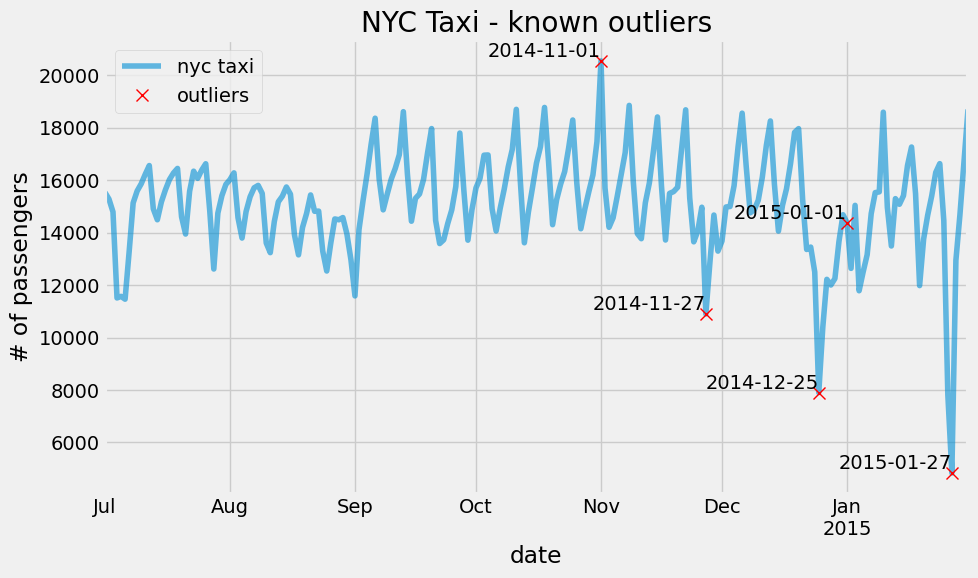

In [23]:
plot_outliers(known_outliers, df_resampled, "known outliers", labels=True)

In [24]:
!uv pip install seaborn

Using Python 3.12.1 environment at: /workspaces/TechCatalyst_DE_2025/dev1
Audited 1 package in 13ms


In [25]:
df_resampled.head()

,value
timestamp,
2014-07-01,15540.979167
2014-07-02,15284.166667
2014-07-03,14794.625000
2014-07-04,11511.770833
2014-07-05,11572.291667


<Axes: ylabel='Count'>

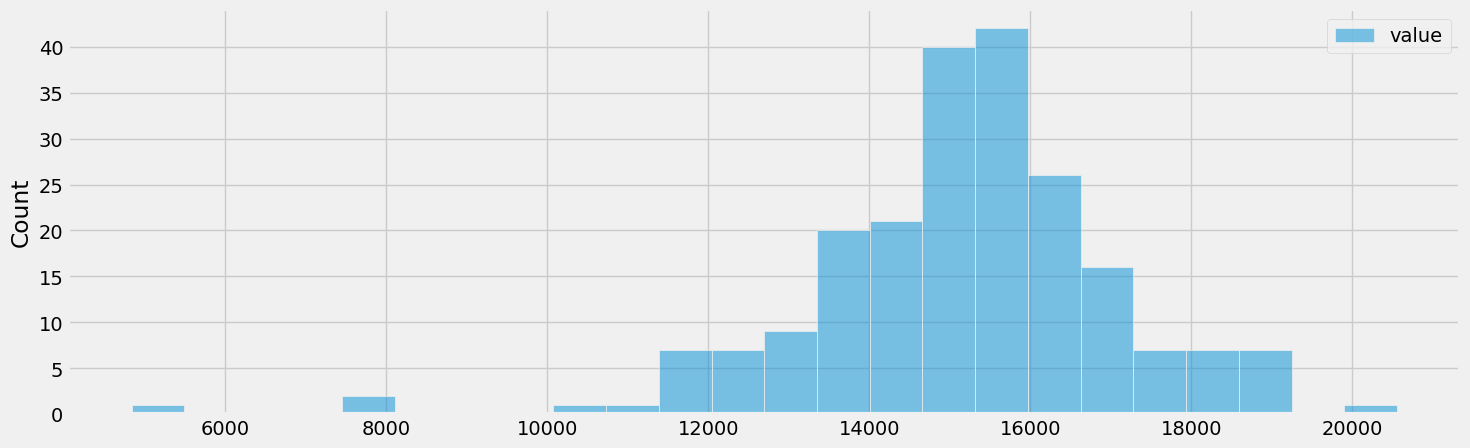

In [26]:
import seaborn as sns

sns.histplot(df_resampled)

<Axes: >

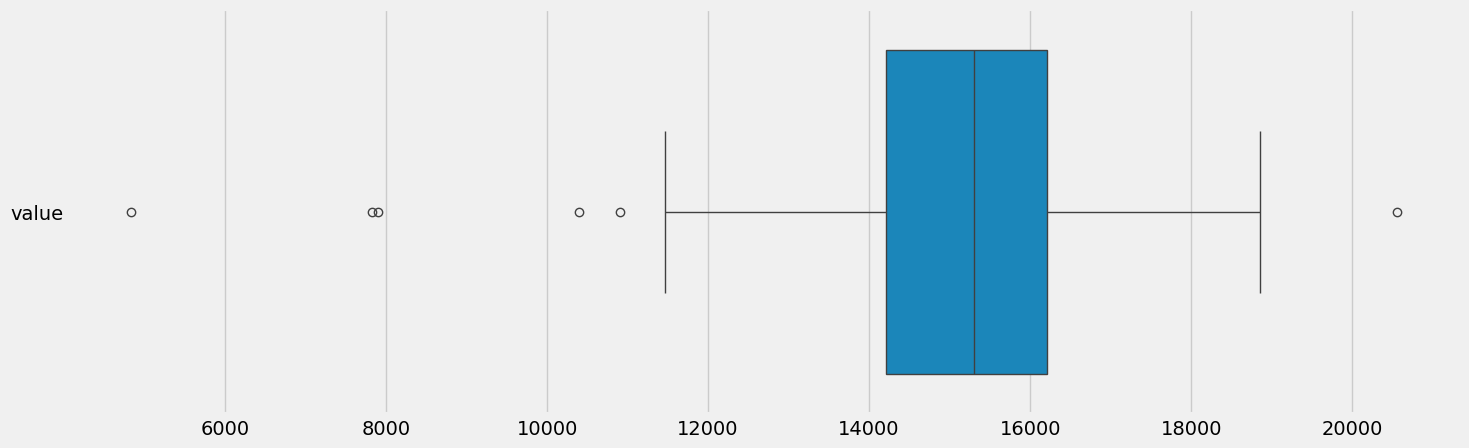

In [27]:
sns.boxplot(df_resampled, orient='h')

In [58]:
import numpy as np

In [78]:
q1, q3 = np.percentile(df_resampled, [25, 75])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)
upper_fence = q3 + (1.5 * IQR)

outliers = df_resampled[(df_resampled['value'] > upper_fence) | (df_resampled['value'] < lower_fence)]

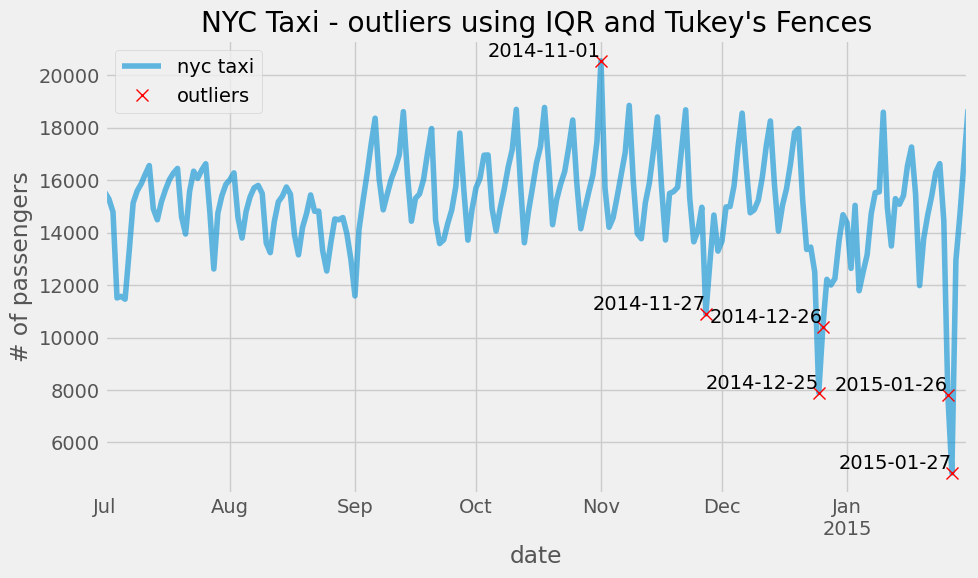

In [79]:
plot_outliers(outliers, df_resampled, "outliers using IQR and Tukey's Fences", labels=True)

In [80]:
!uv pip install pyod

Using Python 3.12.1 environment at: /workspaces/TechCatalyst_DE_2025/dev1
Resolved 18 packages in 876ms                                        
⠙ Preparing packages... (0/4)                                                   
⠙ Preparing packages... (0/4)--------------     0 B/195.93 KiB          
⠙ Preparing packages... (0/4)-------------- 14.08 KiB/195.93 KiB        
⠙ Preparing packages... (0/4)-------------- 14.08 KiB/195.93 KiB        
pyod                 ------------------------------ 14.08 KiB/195.93 KiB
⠙ Preparing packages... (0/4)--------------     0 B/3.71 MiB            
pyod                 ------------------------------ 14.08 KiB/195.93 KiB
⠙ Preparing packages... (0/4)-------------- 14.91 KiB/3.71 MiB          
pyod                 ------------------------------ 14.08 KiB/195.93 KiB
⠙ Preparing packages... (0/4)-------------- 14.91 KiB/3.71 MiB          
pyod                 ------------------------------ 14.08 KiB/195.93 KiB
⠙ Preparing packages... (0/4)-------------- 1

In [122]:
!uv pip install numpy==2.2

Using Python 3.12.1 environment at: /workspaces/TechCatalyst_DE_2025/dev1
⠙                                                                               

Resolved 1 package in 39ms
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)--------------     0 B/15.35 MiB           
⠙ Preparing packages... (0/1)-------------- 16.00 KiB/15.35 MiB         
⠙ Preparing packages... (0/1)-------------- 32.00 KiB/15.35 MiB         
⠙ Preparing packages... (0/1)-------------- 48.00 KiB/15.35 MiB         
⠙ Preparing packages... (0/1)-------------- 64.00 KiB/15.35 MiB         
⠙ Preparing packages... (0/1)-------------- 80.00 KiB/15.35 MiB         
⠙ Preparing packages... (0/1)-------------- 96.00 KiB/15.35 MiB         
⠙ Preparing packages... (0/1)-------------- 112.00 KiB/15.35 MiB        
⠙ Preparing packages... (0/1)-------------- 124.68 KiB/15.35 MiB        
⠙ Preparing packages... (0/1)-------------- 140.68 KiB/15.35 MiB        
⠙ Preparing packages... (0/1)-------------- 156.68 KiB/15.35 MiB        
⠙ Preparing packages... (0/1)-------------- 172.68 KiB/15.35 MiB        
⠙ Preparing pack

In [33]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.abod import ABOD

In [ ]:
knn = KNN(contamination=0.03)

In [35]:
knn.fit(df_resampled)

ABOD(contamination=0.03, method='fast', n_neighbors=5)

In [36]:
knn_pred = pd.Series(knn.predict(df_resampled), index=df_resampled.index)

In [37]:
knn_pred = pd.Series(knn.predict(df_resampled), index=df_resampled.index)
knn_pred

timestamp
2014-07-01    0
2014-07-02    0
2014-07-03    0
2014-07-04    0
2014-07-05    0
             ..
2015-01-27    1
2015-01-28    0
2015-01-29    0
2015-01-30    0
2015-01-31    0
Freq: D, Length: 215, dtype: int64

In [38]:
knn_outliers = knn_pred[knn_pred == 1]
knn_outliers = df_resampled.loc[knn_outliers .index]


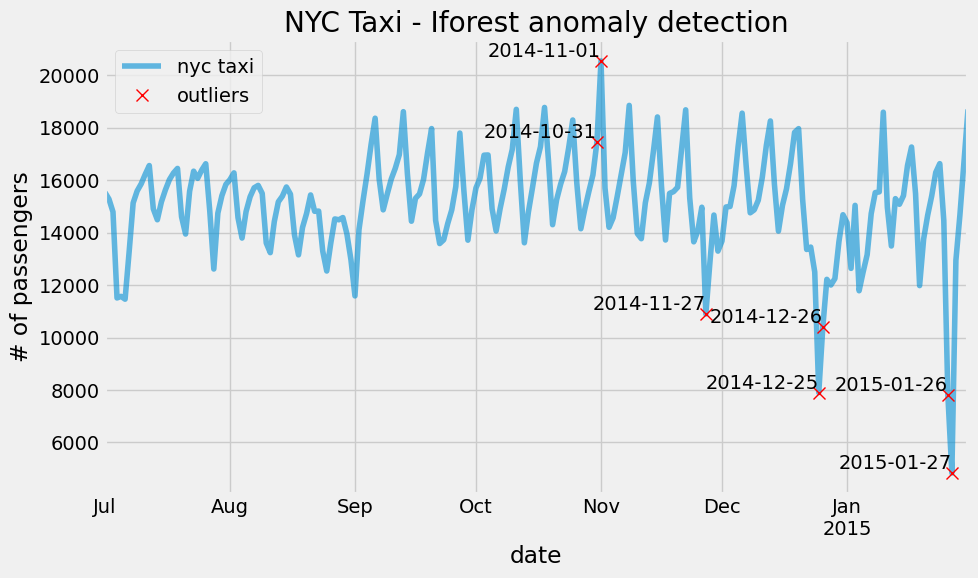

In [39]:
plot_outliers(knn_outliers, df_resampled, "Iforest anomaly detection", labels=True)